In [3]:
!pip install japanize-matplotlib
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 1.4 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/9.8 MB 1.2 MB/s eta 0:00:08
   ---- ----------------------------------- 1.0/9.8 MB 1.1 MB/s eta 0:00:08
   ----- ---------------------------------- 1.3/9.8 MB 1.1 MB/s eta 0:00:08
   ----- ---------------------------------- 1.3/9.8 MB 1.1 MB/s eta 0:00:08
   ------ --------------------------------- 1.6/9.8 MB 1.0 MB/s eta 0:00:08
   ------- -------------------------------- 1.8/9.8 MB 1.1 MB/s eta 0:00:08
   -------- ------------------------------- 2.1/9.8 MB 1.1 MB/s eta 0:00:08
   --------- ------------------------------ 2.4/9.8 MB 1.1 MB/s eta 0:00:07
   ---------- ----------------------------- 2.6/9.8 MB 1.1 MB/s eta 0:00:07
   ----------- ------------------

In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import japanize_matplotlib
import pandas as pd
import statsmodels.api as sm

In [29]:
df = pd.read_csv('anime_flix.csv')

In [30]:
df.columns

Index(['タイトル名', '評価', '視聴数', '制作会社', '声優', '主題歌・挿入歌', 'あらすじ'], dtype='object')

(array([32., 22., 21., 23., 15., 21.,  7., 11., 11.,  1.,  4.,  4.,  2.,
         1.,  1.,  2.,  0.,  0.,  0.,  2.]),
 array([  119.  ,  2805.95,  5492.9 ,  8179.85, 10866.8 , 13553.75,
        16240.7 , 18927.65, 21614.6 , 24301.55, 26988.5 , 29675.45,
        32362.4 , 35049.35, 37736.3 , 40423.25, 43110.2 , 45797.15,
        48484.1 , 51171.05, 53858.  ]),
 <BarContainer object of 20 artists>)

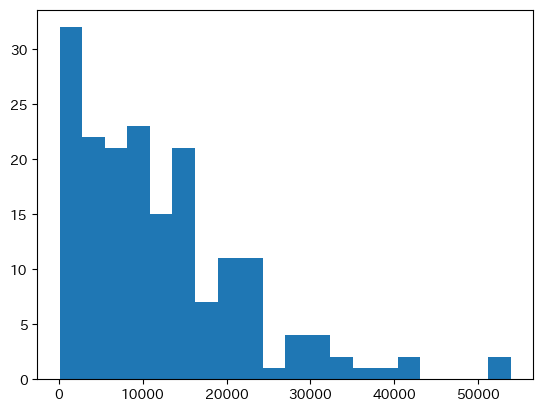

In [31]:
plt.hist(df['視聴数'],bins=20)

In [32]:
# タイトル名で重複を削除（最初の1つを残す）
df = df.drop_duplicates(subset='タイトル名', keep='first')

In [34]:
counts = df['タイトル名'].value_counts()
print(counts)

タイトル名
ダンダダン（2024年製作のアニメ）                    1
チ。 ―地球の運動について―（2024年製作のアニメ）           1
【推しの子】第2期（2024年製作のアニメ）                1
葬送のフリーレン（2023年製作のアニメ）                 1
アオのハコ（2024年製作のアニメ）                    1
                                     ..
義妹生活（2024年製作のアニメ）                     1
異世界のんびり農家（2023年製作のアニメ）                1
るろうに剣心 -明治剣客浪漫譚- 京都動乱（2024年製作のアニメ）    1
精霊幻想記2（2024年製作のアニメ）                   1
先輩はおとこのこ（2024年製作のアニメ）                 1
Name: count, Length: 172, dtype: int64


In [41]:
df = df.sort_values(['制作会社'])
df

,タイトル名,評価,視聴数,制作会社,声優,主題歌・挿入歌,あらすじ
22,リコリス・リコイル（2022年製作のアニメ）,4.1,20844,A-1 Pictures,"['安済知佳', '若山詩音', '小清水亜美', '久野美咲', 'さかき孝輔']","['さユり', 'ClariS']",平穏な日々――その裏には秘密がある\n犯罪を未然に防ぐ秘密組織――「DA（Direct At...
156,青の祓魔師（2011年製作のアニメ）,3.8,6958,A-1 Pictures,"['岡本信彦', '福山潤', '花澤香菜', '中井和哉', '遊佐浩二', '梶裕貴',...","['UVERworld', '2PM', ""ROOKiEZ is PUNK'D"", '黒木メ...",人間の住む「物質界(アッシャー)」と、悪魔の住む「虚無界(ゲヘナ)」。本来は干渉することすら...
168,ソードアート・オンラインII（2014年製作のアニメ）,4.0,10057,A-1 Pictures,"['松岡禎丞', '戸松遥', '伊藤かな恵', '竹達彩奈', '沢城みゆき', '悠木碧...","['藍井エイル', 'LiSA', '春奈るな']",漆黒の銃を持つ謎のアバターに撃たれたプレイヤーは、実際に現実世界でも《死》に至る――
90,ソードアート・オンライン（2012年製作のアニメ）,4.0,15313,A-1 Pictures,"['松岡禎丞', '戸松遥', '伊藤かな恵', '日高里菜', '竹達彩奈', '沢城みゆ...","['LiSA', '藍井エイル', '春奈るな']",フルダイブシステムを利用したオンラインゲーム《ソードアート・オンライン》がスタートする。しか...
114,マッシュル-MASHLE-（2023年製作のアニメ）,3.8,14688,A-1 Pictures,"['小林千晃', '川島零士', '石川界人', '江口拓也', '上田麗奈', '梶裕貴'...","['岡崎体育', 'フィロソフィーのダンス']",ブッ壊すしかないでしょ グーパンで
...,...,...,...,...,...,...,...
171,ワールドトリガー 2ndシーズン（2021年製作のアニメ）,4.2,5551,東映アニメーション,"['村中知', '梶裕貴', '田村奈央', '中村悠一', '田中秀幸', '藤原啓治',...","['神はサイコロを振らない', 'TOMORROW X TOGETHER']",新たな脅威に立ち向かう界境防衛機関“ボーダー”の精鋭たち！
41,ドラゴンボールDAIMA（2024年製作のアニメ）,3.8,518,東映アニメーション,"['野沢雅子', '小林由美子', '内山昂輝', 'ファイルーズあい', '森久保祥太郎'...","['C&K', 'AI']",ようこそ、大魔界へ！！ 新たな世界、新たなドラゴンボール
106,SLAM DUNK（1993年製作のアニメ）,4.4,9351,東映アニメーション,"['草尾毅', '平松晶子', '梁田清之', '緑川光', '置鮎龍太郎']","['BAAD', 'ZYYG', '大黒摩季', 'WANDS', 'MANISH', 'Z...",桜木花道は、中学校三年間で50人もの女子生徒にふられ続けた悲しい男。\n50人目の女子生徒に...
160,ワールドトリガー 3rdシーズン（2021年製作のアニメ）,4.3,4866,東映アニメーション,"['村中知', '梶裕貴', '田村奈央', '杉田智和', '野島裕史', '中村悠一',...","['神はサイコロを振らない', 'FantasticYouth']",新たな脅威に立ち向かう界境防衛機関“ボーダー”の精鋭たち！


データを用いて、制作会社を説明変数、視聴数を目的変数とする重回帰モデルを構築します

In [45]:
#制作会社ごとの差を表示
x = df[['制作会社']]
x = pd.get_dummies(x,drop_first=True,columns=["制作会社"],dtype=int)# 制作会社の列だけダミー変数化
X = sm.add_constant(x)
model = sm.OLS(df["視聴数"],X)# y=aXというモデルを作成
result = model.fit()# パラメータaを推定
print(result.summary())# 推定したパラメータを表示

                            OLS Regression Results                            
Dep. Variable:                    視聴数   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     1.724
Date:                Sun, 17 Nov 2024   Prob (F-statistic):            0.00755
Time:                        21:38:53   Log-Likelihood:                -1773.8
No. Observations:                 172   AIC:                             3658.
Df Residuals:                     117   BIC:                             3831.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               